<a href="https://colab.research.google.com/github/vineetvermaml/NLP-Text-Preprocessing-techniques/blob/main/RNN_LSTM_GRU_Word2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text, sequence
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
from keras.callbacks import ReduceLROnPlateau


In [ ]:
%matplotlib inline  
from nltk.tokenize import word_tokenize
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import scale
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.base import TransformerMixin
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

In [ ]:
from sklearn import model_selection, preprocessing

In [ ]:
!pip install contractions

     |████████████████████████████████| 106 kB 9.7 MB/s 
     |████████████████████████████████| 284 kB 55.6 MB/s 


In [ ]:
import contractions

In [ ]:
import sys  
!{sys.executable} -m pip install contractions

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_md
import spacy

     |████████████████████████████████| 96.4 MB 1.4 MB/s 
  Created wheel for en-core-web-md: filename=en_core_web_md-2.2.5-py3-none-any.whl size=98051301 sha256=8085849de3d25981278f934e198f201d027dfe89bd07b0c341d5aebea29d75eb
  Stored in directory: /tmp/pip-ephem-wheel-cache-g2bquzj9/wheels/69/c5/b8/4f1c029d89238734311b3269762ab2ee325a42da2ce8edb997
Successfully built en-core-web-md
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [ ]:
!pip install nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
df1 =  pd.read_csv('/content/drive/MyDrive/RNN_LSTM_GRU_Word2Vec/dataset.csv', encoding='UTF-8')

In [ ]:
df2 = df1.copy(deep=True)

In [ ]:
df1.shape

(150000, 2)

In [ ]:
df1.isnull().sum()

Column1    0
Column2    0
dtype: int64

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Column1  150000 non-null  object
 1   Column2  150000 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [ ]:
df1.columns

Index(['Column1', 'Column2'], dtype='object')

In [ ]:
df1.rename(columns = {'Column1' : 'Label', 'Column2' : 'Review'}, inplace = True)

In [ ]:
df2.rename(columns = {'Column1' : 'Label', 'Column2' : 'Review'}, inplace = True)

In [ ]:
encoder = preprocessing.LabelEncoder()

In [ ]:
df1['Label'] = encoder.fit_transform(df1['Label'])
# '1' - Good Review
# '0' - Not Good Review

### Converting object type to String type 

In [ ]:
df1['Review']=df1['Review'].astype(str)

In [ ]:
df1 = df1[:10000]

In [ ]:
df1.head(10)

,Label,Review
0,1,Stuning even for the non-gamer: This sound tra...
1,1,The best soundtrack ever to anything.: I'm rea...
2,1,Amazing!: This soundtrack is my favorite music...
3,1,Excellent Soundtrack: I truly like this soundt...
4,1,"Remember, Pull Your Jaw Off The Floor After He..."
5,1,an absolute masterpiece: I am quite sure any o...
6,0,"Buyer beware: This is a self-published book, a..."
7,1,Glorious story: I loved Whisper of the wicked ...
8,1,A FIVE STAR BOOK: I just finished reading Whis...
9,1,Whispers of the Wicked Saints: This was a easy...


# Data Visualization

## Exploratory Analysis on Text DataSet

### Class distribution

In [ ]:
# https://www.kaggle.com/mnavaidd/nlp-exploratory-data-analysis/notebook

In [ ]:
total_good_review = df1[df1['Label'] == 1].shape[0]
total_Not_good_review = df1[df1['Label'] == 0].shape[0]

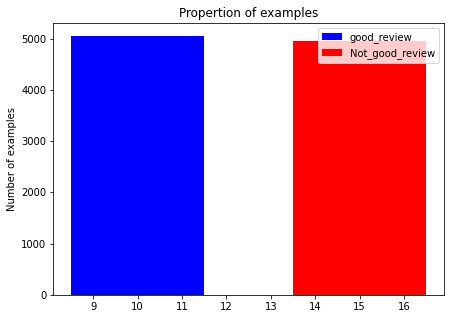

In [ ]:
# bar plot of the 2 classes
plt.rcParams['figure.figsize'] = (7, 5)
plt.bar(10,total_good_review,3, label="good_review", color='blue')
plt.bar(15,total_Not_good_review,3, label="Not_good_review", color='red')
plt.legend()
plt.ylabel('Number of examples')
plt.title('Propertion of examples')
plt.show()

### we can observe that both class are well presented  in the distribution

### No of Characters in Tweet

In [ ]:
def length(text):    
    '''a function which returns the length of text'''
    return len(text)

In [ ]:
df1['NumberOfCharacter'] = df1['Review'].apply(length)

In [ ]:
df1.head(5)

,Label,Review,NumberOfCharacter
0,1,Stuning even for the non-gamer: This sound tra...,426
1,1,The best soundtrack ever to anything.: I'm rea...,509
2,1,Amazing!: This soundtrack is my favorite music...,760
3,1,Excellent Soundtrack: I truly like this soundt...,743
4,1,"Remember, Pull Your Jaw Off The Floor After He...",481


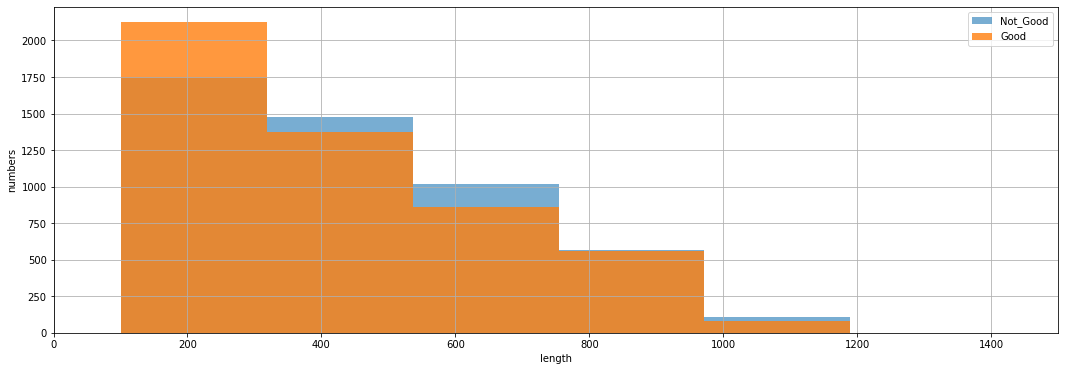

In [ ]:
plt.rcParams['figure.figsize'] = (18.0, 6.0)
bins = 150
plt.hist(df1[df1['Label'] == 0]['NumberOfCharacter'], alpha = 0.6, bins=bins, label='Not_Good')
plt.hist(df1[df1['Label'] == 1]['NumberOfCharacter'], alpha = 0.8, bins=bins, label='Good')
plt.xlabel('length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,1500)
plt.grid()
plt.show()

In [ ]:
df1.shape

(10000, 3)

### Number of words in a Review

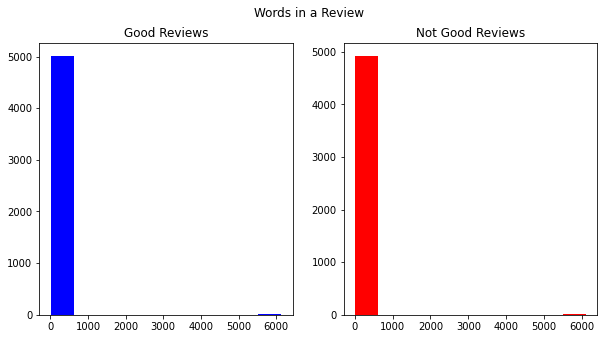

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=df1[df1['Label']==1]['Review'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='blue')
ax1.set_title('Good Reviews')
tweet_len=df1[df1['Label']==0]['Review'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='red')
ax2.set_title('Not Good Reviews')
fig.suptitle('Words in a Review')
plt.show()

In [ ]:
def plot_word_number_histogram(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist()

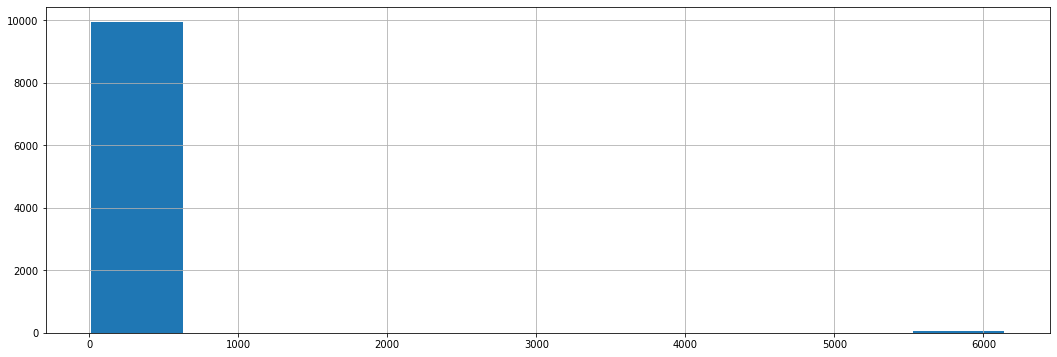

In [ ]:
plot_word_number_histogram(df1['Review'])

In [ ]:
df1.columns

Index(['Label', 'Review', 'NumberOfCharacter'], dtype='object')

In [ ]:
df1['review_length'] = np.array(list(map(len, df1['Review'])))
median = df1['Review'].median()
mean = df1['Review'].mean()
mode = df1['Review'].mode()[0]

In [ ]:
fig, ax = plt.subplots()
sb.distplot(df1['review_length'], bins=df1['review_length'].max(),
            hist_kws={"alpha": 0.9, "color": "blue"}, ax=ax,
            kde_kws={"color": "black", 'linewidth': 3})
ax.set_xlim(left=0, right=np.percentile(df1['review_length'], 95))
ax.set_xlabel('Words in review')
ymax = 0.014
plt.ylim(0, ymax)
ax.plot([mode, mode], [0, ymax], '--', label=f'mode = {mode:.2f}', linewidth=4)
ax.plot([mean, mean], [0, ymax], '--', label=f'mean = {mean:.2f}', linewidth=4)
ax.plot([median, median], [0, ymax], '--',
        label=f'median = {median:.2f}', linewidth=4)
ax.set_title('Words per review distribution', fontsize=20)
plt.legend()
plt.show()

### Average word length in a Review

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Average word length in each Review')

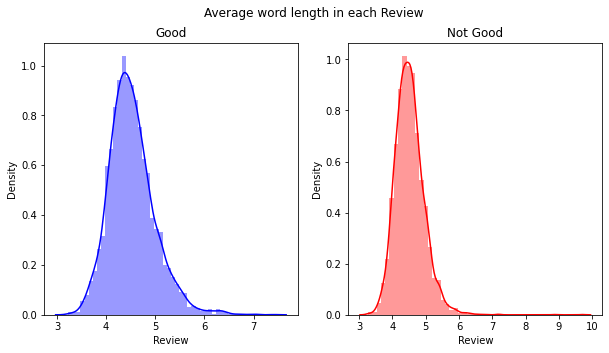

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
word=df1[df1['Label']==1]['Review'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='blue')
ax1.set_title('Good')
word=df1[df1['Label']==0]['Review'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='red')
ax2.set_title('Not Good')
fig.suptitle('Average word length in each Review')

In [ ]:
# https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools

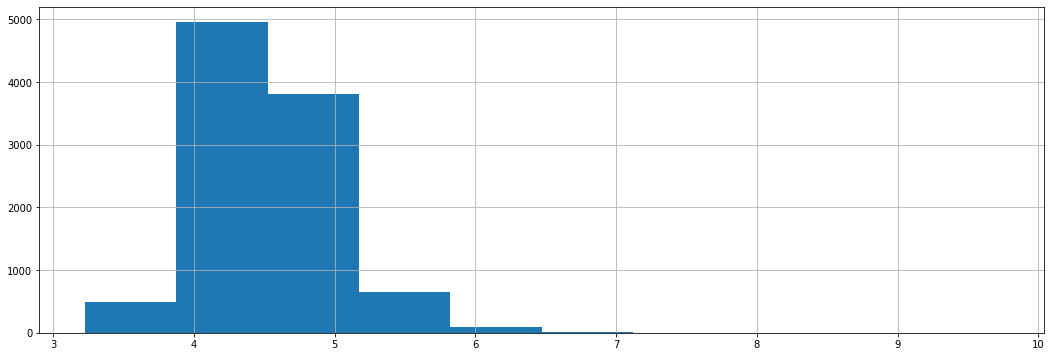

In [ ]:
df1['Review'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

# Text Pre-Processing

In [ ]:
# https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/

In [ ]:
df1['Review'].unique()

array(['Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^',
       "The best soundtrack ever to anything.: I'm reading a lot of reviews saying that this is the best 'game soundtrack' and I figured that I'd write a review to disagree a bit. This in my opinino is Yasunori Mitsuda's ultimate masterpiece. The music is timeless and I'm been listening to it for years now and its beauty simply refuses to fade.The price tag on this is pretty staggering I must say, but if you are going to buy any cd for this much money, this is the only one that I feel would be worth every penny.",
       'Amazing!: This soundtrack is my fav

In [ ]:
for index,text in enumerate(df1['Review'][35:40]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 Profound then. Truly horrible now.: The narrative style of this work by famous founders' biographer John Morse is arrogant, flippant and frequently exaggerated. It carries the tone of the amateur Yankee historian on high, passing judgment on this Southern statesman who was neither from Boston nor a Harvard graduate. Perhaps considered penetrating for its day, it really represents nothing more than opinion today. The research is so thin that one must conclude that Morse wrote the entire manuscript essentially from memory, with little reference to the primary and secondary sources we expect of historians now. If it weren't for the fact that Morse wrote this piece 110 years ago, I'd have rated it only one star.
Review 2:
 Definitely enjoyed!: This was a gift for my 6 yr old daughter. She is a big Barbie fan as well as loves to use the computer. She is still enjoying this game. She completed it in a few hours which worried me at first, but she loves to do it over and over again.

Expand contractions

Lowercase the reviews

Remove digits and words containing digits

Remove punctuations

In [ ]:
def expand_contractions(text):
    """expand shortened words, e.g. don't to do not"""
    text = contractions.fix(text)
    return text

In [ ]:
df1['Review']=df1['Review'].apply(expand_contractions)

In [ ]:
for index,text in enumerate(df1['Review'][35:40]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 Profound then. Truly horrible now.: The narrative style of this work by famous founders' biographer John Morse is arrogant, flippant and frequently exaggerated. It carries the tone of the amateur Yankee historian on high, passing judgment on this Southern statesman who was neither from Boston nor a Harvard graduate. Perhaps considered penetrating for its day, it really represents nothing more than opinion today. The research is so thin that one must conclude that Morse wrote the entire manuscript essentially from memory, with little reference to the primary and secondary sources we expect of historians now. If it were not for the fact that Morse wrote this piece 110 years ago, I would have rated it only one star.
Review 2:
 Definitely enjoyed!: This was a gift for my 6 yr old daughter. She is a big Barbie fan as well as loves to use the computer. She is still enjoying this game. She completed it in a few hours which worried me at first, but she loves to do it over and over a

In [ ]:
df2['Review'][2]

'Amazing!: This soundtrack is my favorite music of all time, hands down. The intense sadness of "Prisoners of Fate" (which means all the more if you\'ve played the game) and the hope in "A Distant Promise" and "Girl who Stole the Star" have been an important inspiration to me personally throughout my teen years. The higher energy tracks like "Chrono Cross ~ Time\'s Scar~", "Time of the Dreamwatch", and "Chronomantique" (indefinably remeniscent of Chrono Trigger) are all absolutely superb as well.This soundtrack is amazing music, probably the best of this composer\'s work (I haven\'t heard the Xenogears soundtrack, so I can\'t say for sure), and even if you\'ve never played the game, it would be worth twice the price to buy it.I wish I could give it 6 stars.'

In [ ]:
df1['Review'][2]

'Amazing!: This soundtrack is my favorite music of all time, hands down. The intense sadness of "Prisoners of Fate" (which means all the more if you have played the game) and the hope in "A Distant Promise" and "Girl who Stole the Star" have been an important inspiration to me personally throughout my teen years. The higher energy tracks like "Chrono Cross ~ Time\'s Scar~", "Time of the Dreamwatch", and "Chronomantique" (indefinably remeniscent of Chrono Trigger) are all absolutely superb as well.This soundtrack is amazing music, probably the best of this composer\'s work (I have not heard the Xenogears soundtrack, so I cannot say for sure), and even if you have never played the game, it would be worth twice the price to buy it.I wish I could give it 6 stars.'

### LowerCase

In [ ]:
def lower_case(text):
  return text.lower()

In [ ]:
df1['Review']=df1['Review'].apply(lower_case)

In [ ]:
df1['Review'][5]

"an absolute masterpiece: i am quite sure any of you actually taking the time to read this have played the game at least once, and heard at least a few of the tracks here. and whether you were aware of it or not, mitsuda's music contributed greatly to the mood of every single minute of the whole game.composed of 3 cds and quite a few songs (i have not an exact count), all of which are heart-rendering and impressively remarkable, this soundtrack is one i assure you you will not forget. it has everything for every listener -- from fast-paced and energetic (dancing the tokage or termina home), to slower and more haunting (dragon god), to purely beautifully composed (time's scar), to even some fantastic vocals (radical dreamers).this is one of the best videogame soundtracks out there, and surely mitsuda's best ever. ^_^"

In [ ]:
df2['Review'][5]

"an absolute masterpiece: I am quite sure any of you actually taking the time to read this have played the game at least once, and heard at least a few of the tracks here. And whether you were aware of it or not, Mitsuda's music contributed greatly to the mood of every single minute of the whole game.Composed of 3 CDs and quite a few songs (I haven't an exact count), all of which are heart-rendering and impressively remarkable, this soundtrack is one I assure you you will not forget. It has everything for every listener -- from fast-paced and energetic (Dancing the Tokage or Termina Home), to slower and more haunting (Dragon God), to purely beautifully composed (Time's Scar), to even some fantastic vocals (Radical Dreamers).This is one of the best videogame soundtracks out there, and surely Mitsuda's best ever. ^_^"

### Remove digits and words containing digits , Punctuation

In [ ]:
def removing_spec(text):
  #formatted_text = re.sub(r"[^a-zA-Z0-9:$-,%.?!]+", ' ', text)
  #formatted_text = re.sub(r'[^a-zA-Z0-9 ]',r'',text)
  formatted_text = re.sub(r'[^a-zA-Z ]',r'',text)
  return formatted_text

In [ ]:
df1['Review']=df1['Review'].apply(removing_spec)

In [ ]:
for index,text in enumerate(df2['Review'][35:40]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 Profound then. Truly horrible now.: The narrative style of this work by famous founders' biographer John Morse is arrogant, flippant and frequently exaggerated. It carries the tone of the amateur Yankee historian on high, passing judgment on this Southern statesman who was neither from Boston nor a Harvard graduate. Perhaps considered penetrating for its day, it really represents nothing more than opinion today. The research is so thin that one must conclude that Morse wrote the entire manuscript essentially from memory, with little reference to the primary and secondary sources we expect of historians now. If it weren't for the fact that Morse wrote this piece 110 years ago, I'd have rated it only one star.
Review 2:
 Definitely enjoyed!: This was a gift for my 6 yr old daughter. She is a big Barbie fan as well as loves to use the computer. She is still enjoying this game. She completed it in a few hours which worried me at first, but she loves to do it over and over again.

In [ ]:
for index,text in enumerate(df1['Review'][35:40]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 profound then truly horrible now the narrative style of this work by famous founders biographer john morse is arrogant flippant and frequently exaggerated it carries the tone of the amateur yankee historian on high passing judgment on this southern statesman who was neither from boston nor a harvard graduate perhaps considered penetrating for its day it really represents nothing more than opinion today the research is so thin that one must conclude that morse wrote the entire manuscript essentially from memory with little reference to the primary and secondary sources we expect of historians now if it were not for the fact that morse wrote this piece  years ago i would have rated it only one star
Review 2:
 definitely enjoyed this was a gift for my  yr old daughter she is a big barbie fan as well as loves to use the computer she is still enjoying this game she completed it in a few hours which worried me at first but she loves to do it over and over again the music is enjoya

We’ll use SpaCy for the removal of stopwords and lemmatization. It is a library for advanced Natural Language Processing in Python and Cython.

In [ ]:
#nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

In [ ]:
# https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools

Stopwords are the words that are most commonly used in any language such as “the”,” a”,” an” etc. As these words are probably small in length these words may have caused the above graph to be left-skewed.

Analyzing the amount and the types of stopwords can give us some good insights into the data.

To get the corpus containing stopwords you can use the nltk library. Nltk contains stopwords from many languages. Since we are only dealing with English news I will filter the English stopwords from the corpus

In [ ]:
stop=set(stopwords.words('english'))

# Top Stop Words in Corpus Barchart

In [ ]:
def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    corpus=[]
    review= df1['Review'].str.split()
    review=review.values.tolist()
    corpus=[word for i in review for word in i]

    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

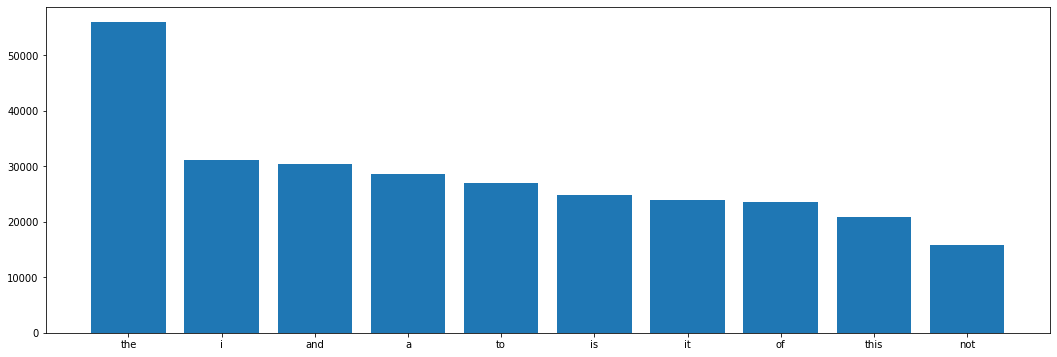

In [ ]:
plot_top_stopwords_barchart(df1['Review'])

# TOP NON STOP WORDS USED IN THE CORPUS

In [ ]:
import seaborn as sns
from nltk.corpus import stopwords
from collections import  Counter

In [ ]:
def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

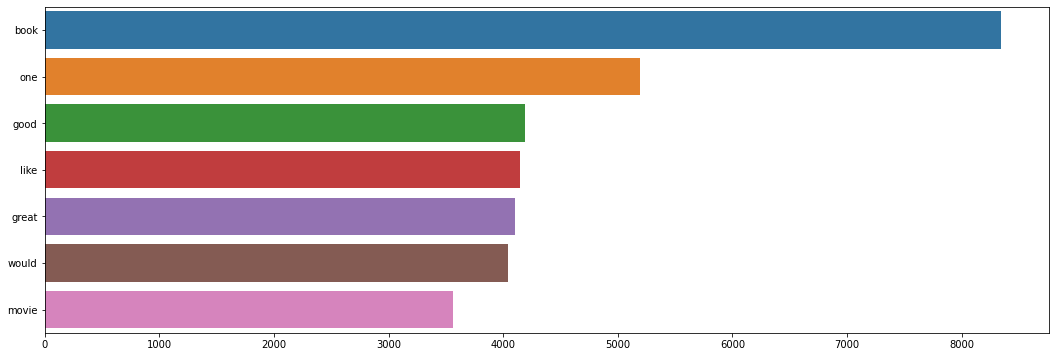

In [ ]:
plot_top_non_stopwords_barchart(df1['Review'])

Dislaying Above Frequency Distribution using another Method

In [ ]:
import string
from nltk import FreqDist

In [ ]:
# def build_corpus(text_col):
#     """To build a text corpus by stitching all the records together.Input the text column"""
#     corpus = ""
#     for sent in text_col:
#         corpus += sent
#     return corpus

In [ ]:
# corpus = build_corpus(df1['Review'])

In [ ]:
# corpus = corpus.split()

In [ ]:
# def plot_word_frequency(words,top_n=10):
#     """Function to plot the word frequencies"""
#     word_freq = FreqDist(words)
#     labels = [element[0] for element in word_freq.most_common(top_n)]
#     counts = [element[1] for element in word_freq.most_common(top_n)]
#     plt.figure(figsize=(15,5))
#     plt.title("Most Frequent Words in the Corpus - Including STOPWORDS")
#     plt.ylabel("Count")
#     plt.xlabel("Word")
#     plot = sns.barplot(labels,counts)
#     return plot

In [ ]:
# corpus_without_stop = [word for word in corpus if word not in stopwords.words("english")]

In [ ]:
# plot_word_frequency(corpus_without_stop,20)

## Wordcloud

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import nltk

In [ ]:
def plot_wordcloud(text):
    nltk.download('stopwords')
    stop=set(stopwords.words('english'))

    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for review in text:
            words=[w for w in word_tokenize(review) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=100,
        max_font_size=30, 
        scale=3,
        random_state=1)
    
    wordcloud=wordcloud.generate(str(corpus))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
 
    plt.imshow(wordcloud)
    plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


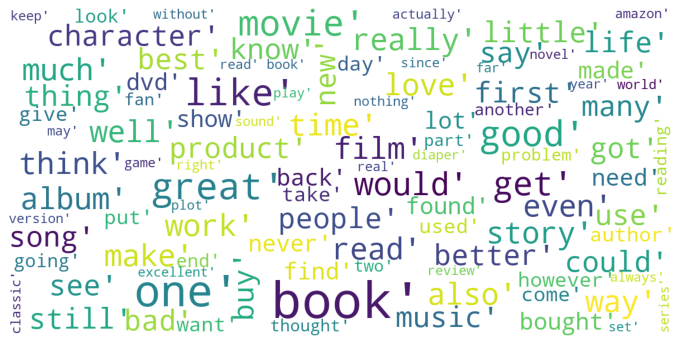

In [ ]:
plot_wordcloud(df1['Review'])

In [ ]:
# https://colab.research.google.com/github/cahya-wirawan/ML-Collection/blob/master/Text_Classification.ipynb#scrollTo=3nf8wMdASa-d

In [ ]:
from sklearn import model_selection, preprocessing
from sklearn import linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import pandas as pd, xgboost, numpy, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers

In [ ]:
df1.columns

Index(['Label', 'Review', 'NumberOfCharacter'], dtype='object')

NLTK for our lemmatization purpose

In [ ]:
#Lemmatize the dataset
from nltk.stem import WordNetLemmatizer

def lemma_traincorpus(data):
    lemmatizer=WordNetLemmatizer()
    out_data=""
    for words in data:
        out_data+= lemmatizer.lemmatize(words)
    return out_data

In [ ]:
df1['Review']=df1['Review'].apply(lambda z: lemma_traincorpus(z))

In [ ]:
import os
import re
import csv
import codecs
import numpy as np
import pandas as pd

from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from string import punctuation

from gensim.models import KeyedVectors
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers.merge import concatenate
from keras.models import Model
#from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_x, test_x, train_y, test_y=train_test_split(df1['Review'],df1['Label'],test_size=0.2,random_state=2022)

In [ ]:
# Using Startification
# xtrain, xvalid, ytrain, yvalid = train_test_split(train.comment_text.values, train.toxic.values, 
#                                                   stratify=train.toxic.values, 
#                                                   random_state=42, 
#                                                   test_size=0.2, shuffle=True)

# Tokenize the Input Features

In [ ]:
# # load the pre-trained word-embedding vectors 
# embeddings_index = {}
# for i, line in enumerate(open('drive/My Drive/lmdata/wiki-news-300d-1M.vec')):
#     values = line.split()
#     embeddings_index[values[0]] = numpy.asarray(values[1:], dtype='float32')

In [ ]:
maxlen=1000
max_features=5000 
embed_size=300

In [ ]:
tokenizer=Tokenizer(num_words=max_features)

In [ ]:
tokenizer.fit_on_texts(list(train_x))
train_x=tokenizer.texts_to_sequences(train_x)
test_x=tokenizer.texts_to_sequences(test_x)

In [ ]:
train_x=pad_sequences(train_x,maxlen=maxlen)
test_x=pad_sequences(test_x,maxlen=maxlen)

In [ ]:
print("Padded and Tokenized Training Sequence".format(),train_x.shape)
print("Target Values Shape".format(),train_y.shape)
print("Padded and Tokenized Training Sequence".format(),test_x.shape)
print("Target Values Shape".format(),test_y.shape)

Padded and Tokenized Training Sequence (8000, 1000)
Target Values Shape (8000,)
Padded and Tokenized Training Sequence (2000, 1000)
Target Values Shape (2000,)


In [ ]:
from gensim.models import KeyedVectors
EMBEDDING_FILE = '/content/drive/MyDrive/RNN_LSTM_GRU_Word2Vec/GoogleNews-vectors-negative300.bin'

embeddings_index = KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary=True)

word_index = tokenizer.word_index

nb_words = min(max_features, len(word_index))

embedding_matrix = (np.random.rand(nb_words, embed_size) - 0.5) / 5.0

for word, i in word_index.items():
    if i >= max_features: continue
    if word in embeddings_index:
        embedding_vector = embeddings_index.get_vector(word)
        embedding_matrix[i] = embedding_vector

In [ ]:
embedding_matrix.shape

(5000, 300)

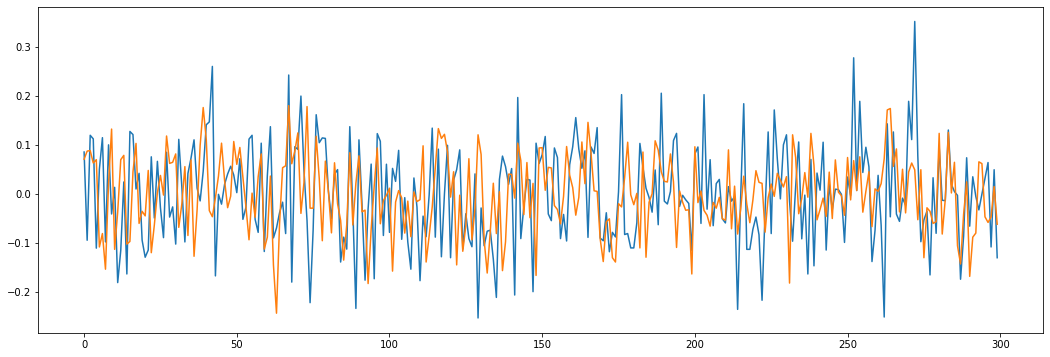

In [ ]:
#visualize the embeddings-FastText
plt.plot(embedding_matrix[10])
plt.plot(embedding_matrix[11])

In [ ]:
# # scale the data before any neural net:
# scl = preprocessing.StandardScaler()
# xtrain_glove_scl = scl.fit_transform(xtrain_glove)
# xvalid_glove_scl = scl.transform(xvalid_glove)

## LSTM or Bi-Directional RNN

In [ ]:
from keras.layers import Bidirectional, GlobalMaxPool1D

In [ ]:
inp=Input(shape=(maxlen,))
z=Embedding(max_features,embed_size,weights=[embedding_matrix])(inp)
z=Bidirectional(LSTM(60,return_sequences='True'))(z)
z=GlobalMaxPool1D()(z)
z=Dense(16,activation='relu')(z)
z=Dense(1,activation='sigmoid')(z)
model=Model(inputs=inp,outputs=z)
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1000)]            0         
                                                                 
 embedding (Embedding)       (None, 1000, 300)         1500000   
                                                                 
 bidirectional (Bidirectiona  (None, 1000, 120)        173280    
 l)                                                              
                                                                 
 global_max_pooling1d (Globa  (None, 120)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 16)                1936      
                                                                 
 dense_1 (Dense)             (None, 1)                 17    

In [ ]:
history = model.fit(train_x,train_y,batch_size=32,epochs=1,verbose=2,validation_data=(test_x,test_y))

250/250 - 482s - loss: 0.1532 - accuracy: 0.9434 - val_loss: 0.3210 - val_accuracy: 0.8760 - 482s/epoch - 2s/step


In [ ]:
# history = model.fit(
#     train_x,
#     train_y,
#     validation_data=(test_x, test_y),
#     batch_size=100,
#     epochs=20)

In [ ]:
model.fit(train_x, train_y, validation_split=0.3, epochs=1)

175/175 [==============================] - 392s 2s/step - loss: 0.2003 - accuracy: 0.9230 - val_loss: 0.2069 - val_accuracy: 0.9167


In [ ]:
def plot_confusion_matrix(y_true, y_pred, ax, class_names, vmax=None,
                          normed=True, title='Confusion matrix'):
    matrix = confusion_matrix(y_true,y_pred)
    if normed:
        matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
    sns.heatmap(matrix, vmax=vmax, annot=True, square=True, ax=ax,
               cmap=plt.cm.Blues_r, cbar=False, linecolor='black',
               linewidths=1, xticklabels=class_names)
    ax.set_title(title, y=1.20, fontsize=16)
    #ax.set_ylabel('True labels', fontsize=12)
    ax.set_xlabel('Predicted labels', y=1.10, fontsize=12)
    ax.set_yticklabels(class_names, rotation=0)

In [ ]:
test_x.shape

(2000, 1000)

In [ ]:
#%%time
y_train_pred = model.predict(train_x)


In [ ]:
y_test_pred = model.predict(test_x)

In [ ]:
y_test_pred.shape

(2000, 1)

In [ ]:
def myfunc(pred_prob):
  if pred_prob > 0.50:
    pred_prob = 1
  else:
    pred_prob = 0
  return pred_prob


In [ ]:
myfunc_vec = np.vectorize(myfunc)
y_train_pred = myfunc_vec(y_train_pred)

In [ ]:
myfunc_vec = np.vectorize(myfunc)
y_test_pred = myfunc_vec(y_test_pred)

In [ ]:
y_train_pred.shape

(8000, 1)

In [ ]:
y_test_pred.shape

(2000, 1)

In [ ]:
# https://www.kaggle.com/alexcherniuk/imdb-review-word2vec-bilstm-99-acc

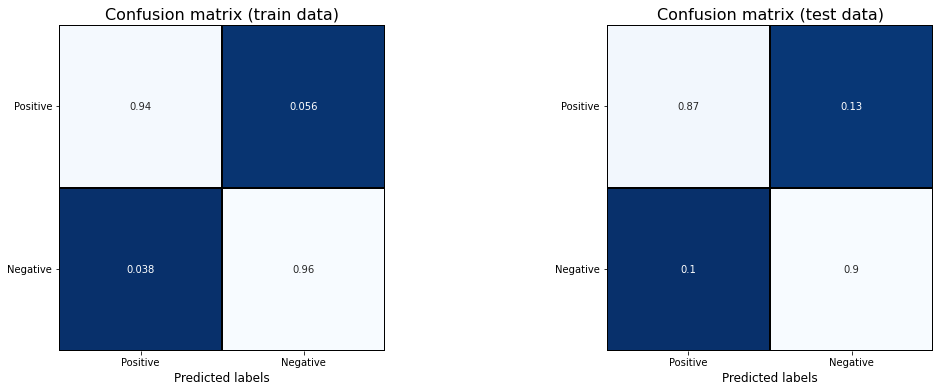

In [ ]:
fig, (axis1, axis2) = plt.subplots(nrows=1, ncols=2)
plot_confusion_matrix(train_y, y_train_pred, ax=axis1,
                      title='Confusion matrix (train data)',
                      class_names=['Positive', 'Negative'])

plot_confusion_matrix(test_y, y_test_pred, ax=axis2,
                      title='Confusion matrix (test data)',
                      class_names=['Positive', 'Negative'])

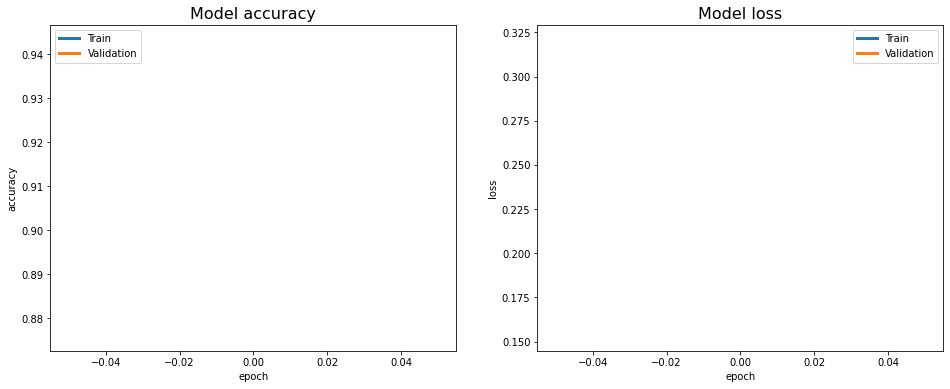

In [ ]:
fig, (axis1, axis2) = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

# summarize history for accuracy
axis1.plot(history.history['accuracy'], label='Train', linewidth=3)
axis1.plot(history.history['val_accuracy'], label='Validation', linewidth=3)
axis1.set_title('Model accuracy', fontsize=16)
axis1.set_ylabel('accuracy')
axis1.set_xlabel('epoch')
axis1.legend(loc='upper left')

# summarize history for loss
axis2.plot(history.history['loss'], label='Train', linewidth=3)
axis2.plot(history.history['val_loss'], label='Validation', linewidth=3)
axis2.set_title('Model loss', fontsize=16)
axis2.set_ylabel('loss')
axis2.set_xlabel('epoch')
axis2.legend(loc='upper right')
plt.show()

In [ ]:
history.history

{'accuracy': [0.9433749914169312],
 'loss': [0.15316753089427948],
 'val_accuracy': [0.8759999871253967],
 'val_loss': [0.3210286498069763]}

In [ ]:
#Prediction is in probability of news being real, so converting into classes
# Class 0 (Fake) if predicted prob < 0.5, else class 1 (Real)
# y_pred = (model.predict(X_test) >= 0.5).astype("int")

In [ ]:
accuracy_score(test_y, y_test_pred)

0.884

In [ ]:
print(classification_report(test_y, y_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       999
           1       0.88      0.90      0.89      1001

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000



In [ ]:
# https://www.kaggle.com/tanulsingh077/deep-learning-for-nlp-zero-to-transformers-bert

In [ ]:
# https://www.kaggle.com/tanulsingh077/deep-learning-for-nlp-zero-to-transformers-bert
def roc_auc(predictions,target):
    '''
    This methods returns the AUC Score when given the Predictions
    and Labels
    '''
    
    fpr, tpr, thresholds = metrics.roc_curve(target, predictions)
    roc_auc = metrics.auc(fpr, tpr)
    return roc_auc

In [ ]:
print("Auc: %.2f%%" % (roc_auc(y_test_pred,test_y)))

Auc: 0.88%


In [ ]:
del model

In [ ]:
# import gc
# gc.collect()

18540

In [ ]:
# https://www.kaggle.com/kakiac/deep-learning-4-text-classification-cnn-bi-lstm

In [ ]:
# embedding_layer = tf.keras.layers.Embedding(vocab_size,
#                                           EMBEDDING_DIM,
#                                           weights=[embedding_matrix],
#                                           input_length=MAX_SEQUENCE_LENGTH,
#                                           trainable=False)

In [ ]:
# https://www.kaggle.com/arunrk7/nlp-beginner-text-classification-using-lstm

In [ ]:
# https://www.kaggle.com/rajmehra03/a-complete-text-classfication-guide-word2vec-lstm

In [ ]:
# https://www.analyticsvidhya.com/blog/2021/07/word2vec-for-word-embeddings-a-beginners-guide/

In [ ]:
# https://www.kaggle.com/rajmehra03/a-complete-text-classfication-guide-word2vec-lstm

## GRU

In [ ]:
from keras.layers import GlobalAveragePooling1D,GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from keras.layers.recurrent import LSTM, GRU

In [ ]:
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline

In [ ]:
type(train_x)

numpy.ndarray

In [ ]:
import copy
train_x1 = copy.deepcopy(train_x)
test_x1 = copy.deepcopy(test_x)

In [ ]:
# # scale the data before any neural net:
# scl = preprocessing.StandardScaler()
# xtrain_glove_scl = scl.fit_transform(xtrain_glove)
# xvalid_glove_scl = scl.transform(xvalid_glove)

In [ ]:
embed_size

300

In [ ]:
# GRU with Word2Vec embeddings and two dense layers
# https://www.kaggle.com/abhishek/approaching-almost-any-nlp-problem-on-kaggle
model = Sequential()
model.add(Embedding(max_features,
                     embed_size,
                     weights=[embedding_matrix],
                     input_length=maxlen,
                     trainable=False))
model.add(SpatialDropout1D(0.3))
model.add(GRU(300, dropout=0.3, recurrent_dropout=0.3, return_sequences=True))
model.add(GRU(300, dropout=0.3, recurrent_dropout=0.3))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.8))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.8))

model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 1000, 300)         1500000   
                                                                 
 spatial_dropout1d_2 (Spatia  (None, 1000, 300)        0         
 lDropout1D)                                                     
                                                                 
 gru_4 (GRU)                 (None, 1000, 300)         540900    
                                                                 
 gru_5 (GRU)                 (None, 300)               540900    
                                                                 
 dense_8 (Dense)             (None, 1024)              308224    
                                                                 
 dropout_4 (Dropout)         (None, 1024)              0         
                                                      

In [ ]:
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')

In [ ]:
# Fit the model with early stopping callback
history = model.fit(train_x,train_y, batch_size=32, epochs=1, 
          verbose=1, validation_data=(test_x, test_y), callbacks=[earlystop])

 83/250 [========>.....................] - ETA: 1:05:27 - loss: 0.0000e+00 - accuracy: 0.4977

KeyboardInterrupt: ignored

In [ ]:
# https://colab.research.google.com/github/cahya-wirawan/ML-Collection/blob/master/Text_Classification.ipynb#scrollTo=YErL4IVA5jrD

In [ ]:
# history = model.fit(train_x,train_y,batch_size=32,epochs=1,verbose=2,validation_data=(test_x,test_y))

## CNN - Bi Directional 

In [ ]:
sequence_input = Input(shape=(maxlen, ))
x = Embedding(max_features, embed_size, weights=[embedding_matrix],trainable = False)(sequence_input)
x = SpatialDropout1D(0.2)(x)
x = Bidirectional(LSTM(128, return_sequences=True,dropout=0.1,recurrent_dropout=0.1))(x)
x = Conv1D(64, kernel_size = 3, padding = "valid", kernel_initializer = "glorot_uniform")(x)
avg_pool = GlobalAveragePooling1D()(x)
max_pool = GlobalMaxPooling1D()(x)
x = concatenate([avg_pool, max_pool]) 
# x = Dense(128, activation='relu')(x)
# x = Dropout(0.1)(x)
preds = Dense(1, activation="sigmoid")(x)
model = Model(sequence_input, preds)
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 1000)]       0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 1000, 300)    1500000     ['input_2[0][0]']                
                                                                                                  
 spatial_dropout1d_1 (SpatialDr  (None, 1000, 300)   0           ['embedding_1[0][0]']            
 opout1D)                                                                                         
                                                                                                  
 bidirectional_1 (Bidirectional  (None, 1000, 256)   439296      ['spatial_dropout1d_1[0][0]

In [ ]:
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')

In [ ]:
history = model.fit(train_x,train_y, batch_size=32, epochs=1, 
          verbose=1, validation_data=(test_x, test_y), callbacks=[earlystop])

250/250 [==============================] - 2403s 10s/step - loss: 0.3438 - accuracy: 0.8518 - val_loss: 0.3523 - val_accuracy: 0.8435


In [ ]:
#Prediction is in probability of Review being good, so converting into classes
# Class 0 (not Good) if predicted prob < 0.5, else class 1 (Good )
y_train_pred = (model.predict(train_x) >= 0.5).astype("int")
y_test_pred = (model.predict(test_x) >= 0.5).astype("int")

In [ ]:
def plot_confusion_matrix(y_true, y_pred, ax, class_names, vmax=None,
                          normed=True, title='Confusion matrix'):
    matrix = confusion_matrix(y_true,y_pred)
    if normed:
        matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
    sns.heatmap(matrix, vmax=vmax, annot=True, square=True, ax=ax,
               cmap=plt.cm.Blues_r, cbar=False, linecolor='black',
               linewidths=1, xticklabels=class_names)
    ax.set_title(title, y=1.20, fontsize=16)
    #ax.set_ylabel('True labels', fontsize=12)
    ax.set_xlabel('Predicted labels', y=1.10, fontsize=12)
    ax.set_yticklabels(class_names, rotation=0)

In [ ]:
fig, (axis1, axis2) = plt.subplots(nrows=1, ncols=2)
plot_confusion_matrix(train_y, y_train_pred, ax=axis1,
                      title='Confusion matrix (train data)',
                      class_names=['Positive', 'Negative'])

plot_confusion_matrix(test_y, y_test_pred, ax=axis2,
                      title='Confusion matrix (test data)',
                      class_names=['Positive', 'Negative'])

In [ ]:
fig, (axis1, axis2) = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

# summarize history for accuracy
axis1.plot(history.history['accuracy'], label='Train', linewidth=3)
axis1.plot(history.history['val_accuracy'], label='Validation', linewidth=3)
axis1.set_title('Model accuracy', fontsize=16)
axis1.set_ylabel('accuracy')
axis1.set_xlabel('epoch')
axis1.legend(loc='upper left')

# summarize history for loss
axis2.plot(history.history['loss'], label='Train', linewidth=3)
axis2.plot(history.history['val_loss'], label='Validation', linewidth=3)
axis2.set_title('Model loss', fontsize=16)
axis2.set_ylabel('loss')
axis2.set_xlabel('epoch')
axis2.legend(loc='upper right')
plt.show()

In [ ]:
history.history